In [1]:
!pip install chess

     |████████████████████████████████| 147 kB 4.1 MB/s 


In [129]:
import chess
import chess.engine
import chess.svg
import time
from IPython.display import SVG, display

## Evaluation

In [130]:
# Value of piece position
pawntable = [
    0, 0, 0, 0, 0, 0, 0, 0,
    5, 10, 10, -20, -20, 10, 10, 5,
    5, -5, -10, 0, 0, -10, -5, 5,
    0, 5, 10, 20, 20, 10, 5, 0,
    5, 5, 10, 25, 25, 10, 5, 5,
    10, 10, 20, 30, 30, 20, 10, 10,
    50, 50, 50, 50, 50, 50, 50, 50,
    90, 90, 90, 90, 90, 90, 90, 90]

knightstable = [
    -50, -40, -30, -30, -30, -30, -40, -50,
    -40, -20, 0, 5, 5, 0, -20, -40,
    -30, 5, 10, 15, 15, 10, 5, -30,
    -30, 0, 15, 20, 20, 15, 0, -30,
    -30, 5, 15, 20, 20, 15, 5, -30,
    -30, 0, 10, 15, 15, 10, 0, -30,
    -40, -20, 0, 0, 0, 0, -20, -40,
    -50, -40, -30, -30, -30, -30, -40, -50]

bishopstable = [
    -20, -10, -10, -10, -10, -10, -10, -20,
    -10, 10, 0, 0, 0, 0, 10, -10,                  
    -15, 10, 10, 10, 10, 10, 10, -15,
    -10, 0, 10, 10, 10, 10, 0, -10,
    -10, 5, 5, 10, 10, 5, 5, -10,
    -10, 0, 5, 10, 10, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -10, -10, -10, -10, -20]   # 5 ,5, -10, -10

rookstable = [
    0, 0, 0, 5, 5, 0, 0, 0,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 5, 5, 5, 5, 5, 5, -5,
    -5,5, 5, 5, 5, 5, 5, -5,
    -5, 5, 5, 5, 5, 5, 5, -5,
    -5, 5, 5, 5, 5, 5, 5, -5,
    5, 10, 10, 10, 10, 10, 10, 5,
    5, 5, 0, 0, 0, 0, 5, 5]

queenstable = [
    -20, -10, -10, -5, -5, -10, -10, -20,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -10, 5, 5, 5, 5, 5, 0, -10,
    0, 0, 5, 5, 5, 5, 0, -5,
    -5, 0, 5, 5, 5, 5, 0, -5,
    -10, 0, 5, 5, 5, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -5, -5, -10, -10, -20]

kingstable = [
    20, 30, 10, 0, 0, 10, 30, 20,
    20, 20, 0, 0, 0, 0, 20, 20,
    -10, -20, -20, -20, -20, -20, -20, -10,
    -20, -30, -30, -40, -40, -30, -30, -20,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30]

In [131]:

# Stockfish evaluation
def stockfish_eval(board_instance, depth):
    move = chess.engine.analyse(board, chess.engine.Limit(time=0.01))
    # print(move)
    return chess.engine.PovScore(move['score'], chess.BLACK).pov(chess.BLACK).relative.score()

# Self-defined static evaluation
def Static_Evaluation(current_board):
  i = 0
  evaluation = 0
  x = True
  try:
    x = bool(current_board.piece_at(i).holder)
  except AttributeError as e:
    x = x
  while i < 63: 
    evaluation = evaluation + (get_piece_val(str(current_board.piece_at(i))) if x else -get_piece_val(str(current_board.piece_at(i))))
  return evaluation

def get_piece_val(piece):
  if(piece == None):
      return 0
  value = 0
  if piece == "P" or piece == "p":
      value = 10
  if piece == "N" or piece == "n":
      value = 30
  if piece == "B" or piece == "b":
      value = 30
  if piece == "R" or piece == "r":
      value = 50
  if piece == "Q" or piece == "q":
      value = 90
  if piece == 'K' or piece == 'k':
      value = 900
  #value = value if (board.piece_at(place)).color else -value
  return value

# Minh's evalution case
def material_point(board):
    # Pawn difference = # of white pawns - # of black pawns
    pawn_diff = len(board.pieces(chess.PAWN, chess.WHITE)) - len(board.pieces(chess.PAWN, chess.BLACK))
    # Knight difference = # of white knight - # of black knight
    knight_diff = len(board.pieces(chess.KNIGHT, chess.WHITE)) - len(board.pieces(chess.KNIGHT, chess.BLACK))
    # Bishop difference = # of white bishop - # of black bishop
    bishop_diff = len(board.pieces(chess.BISHOP, chess.WHITE)) - len(board.pieces(chess.BISHOP, chess.BLACK))
    # Rook difference = # of white rook - # of black rook
    rook_diff = len(board.pieces(chess.ROOK, chess.WHITE)) - len(board.pieces(chess.ROOK, chess.BLACK))
    # Queen difference = # of white queen - # of black queen
    queen_diff = len(board.pieces(chess.QUEEN, chess.WHITE)) - len(board.pieces(chess.QUEEN, chess.BLACK))
    return 100*pawn_diff + 320*knight_diff + 330*bishop_diff + 500*rook_diff + 900*queen_diff

def position_point(board):
    # pawn_pos = pawn_white_point + pawn_black_point
    pawn_pos = sum([pawntable[i] for i in board.pieces(chess.PAWN, chess.WHITE)]) + sum([-pawntable[chess.square_mirror(i)] for i in board.pieces(chess.PAWN, chess.BLACK)])
    # knight_pos = knight_white_point + knight_black_point
    knight_pos = sum([knightstable[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)]) + sum([-knightstable[chess.square_mirror(i)] for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    # bishop_pos = bishop_white_point + bishop_black_point
    bishop_pos = sum([bishopstable[i] for i in board.pieces(chess.BISHOP, chess.WHITE)]) + sum([-bishopstable[chess.square_mirror(i)] for i in board.pieces(chess.BISHOP, chess.BLACK)])
    # rook_pos = rook_white_point + rook_black_point
    rook_pos = sum([rookstable[i] for i in board.pieces(chess.ROOK, chess.WHITE)]) + sum([-rookstable[chess.square_mirror(i)] for i in board.pieces(chess.ROOK, chess.BLACK)])
    # queen_pos = queen_white_point + queen_black_point
    queen_pos = sum([queenstable[i] for i in board.pieces(chess.QUEEN, chess.WHITE)]) + sum([-queenstable[chess.square_mirror(i)] for i in board.pieces(chess.QUEEN, chess.BLACK)])
    # king_pos = king_white_point + king_black_point
    king_pos = sum([kingstable[i] for i in board.pieces(chess.KING, chess.WHITE)]) + sum([-kingstable[chess.square_mirror(i)] for i in board.pieces(chess.KING, chess.BLACK)])
    return pawn_pos + knight_pos + bishop_pos + rook_pos + queen_pos + king_pos

def evaluatePoint(board, depth):
  evaluate_point = material_point(board) + position_point(board)
  return evaluate_point


## Search algorithm

In [132]:
"""
class Search_Algorithm:

  def __init__(self, alpha, beta):
    self.alpha = alpha # set alpha = -10000 for initial
    self.beta = beta   # set beta  =  10000 for initial
    eval = Evaluation  # setup evaluation method
    self.evaluation = eval
"""
def minimax(current_board, max_depth, current_depth, isMax, nodes_per_depth):
  # For analysis of algorithms, by couting number of nodes explored
  if max_depth - current_depth in nodes_per_depth:
    nodes_per_depth[max_depth - current_depth] += 1
  else:
    nodes_per_depth[max_depth - current_depth] = 1

  # The stop case: king is captured or draw play once
  # case: check-mate
  if current_board.is_checkmate():
    if isMax:
      return -10000
    else:
      return 10000
    
  # case: draw once
  if current_board.is_stalemate():
    return 0

  # case: Terminal node: Game over
  if current_board.is_insufficient_material():
    return 0

  # case: find till the last children
  if current_depth == 0:
    return evaluatePoint(current_board, current_depth)

  # Backtrack and find children
  if isMax:
    # set high negative value/none of static evaluation < this value
    best_score = -1e5
    for legal_move in current_board.legal_moves:
      move = chess.Move.from_uci(str(legal_move))
      # pushing current move to board
      current_board.push(move)
      # calculate node score , if it's leaf node then return evaluation value
      node_score = minimax(current_board, max_depth, current_depth-1, False, nodes_per_depth)
      # calculating max value for current node
      best_score = max(node_score, best_score)
      # backtrach the last move -> evaluate next legal move
      current_board.pop()
    return best_score

  else:
    # set the high positive value
    best_score = 1e5
    for legal_move in current_board.legal_moves:
      move = chess.Move.from_uci(str(legal_move))
      # push current move to the board
      current_board.push(move)
      # calculate node score, if leaf node then return evalation value
      node_score = minimax(current_board, max_depth, current_depth-1, True, nodes_per_depth)
      # calculate min value
      best_score = min(node_score, best_score)
      # backtrack the last move -> evaluate next legal move
      current_board.pop()
  return best_score


## Find best move

In [133]:
def findBestMove(current_board, depth, isMax):
  if current_board.is_checkmate():
    return chess.Move.null()

  best_move = chess.Move.null()
  nodes_per_depth = dict()

  start = time.time()
  if isMax:
    best_score = -10000
    for legal_move in current_board.legal_moves:
      move = chess.Move.from_uci(str(legal_move))
      current_board.push(move)
      move_score = minimax(current_board, depth, depth, False, nodes_per_depth)
      score = max(best_score, move_score)
      current_board.pop()
      if score > best_score:
        best_score = score
        best_move = move
    end = time.time()
    print("Time: {} s".format(end-start))
    return best_move
  else:
    best_score = 10000
    for legal_move in current_board.legal_moves:
      move = chess.Move.from_uci(str(legal_move))
      current_board.push(move)
      move_score = minimax(current_board, depth, depth, True, nodes_per_depth)
      score = min(best_score, move_score)
      current_board.pop()
      if score < best_score:
        best_score = score
        best_move = move
    end = time.time()
    print("Time: {} s".format(end - start))
    return best_move


## Machine - Machine

# BLACK is MAX, WHITE is MIN

In [134]:
def game_between_two_computer(depth=3):
    board = chess.Board()
    
    for n in range(0,10):
        start = time.time()
        if n%2 == 0:
            print("WHITE Turn")
            move = findBestMove(board, depth, False)
        else: 
            print("BLACK Turn")
            move = findBestMove(board, depth, True)
        end = time.time()
        
        print("Move in UCI format:", move)
        # print("Nodes per depth:", nodes_per_depth)
        print("Time taken by Move:", end-start)
        board.push(move)
        display(SVG(chess.svg.board(board, size=400)))  
        print("\n")

In [137]:
board = chess.Board()

## Chess Board Representation before best move¶

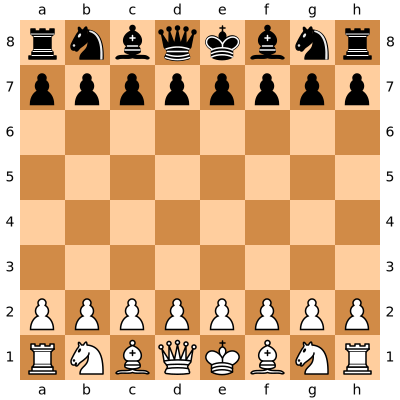

In [138]:
board

### WHITE move

In [139]:
move = findBestMove(board, 3, True)

Time: 20.59184432029724 s


In [140]:
move

Move.from_uci('g1f3')

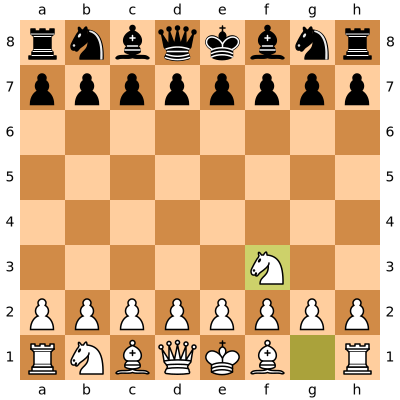

In [141]:
board.push(move)
board

WHITE Turn
Time: 20.62434482574463 s
Move in UCI format: f2f3
Time taken by Move: 20.625985622406006


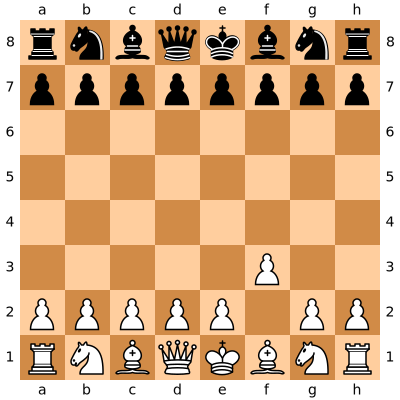



BLACK Turn
Time: 18.88779878616333 s
Move in UCI format: f7f6
Time taken by Move: 18.88801670074463


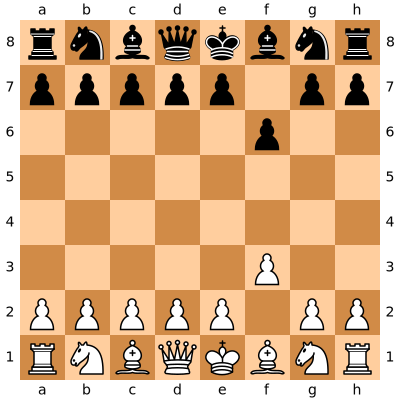



WHITE Turn
Time: 17.327911853790283 s
Move in UCI format: g2g3
Time taken by Move: 17.32901096343994


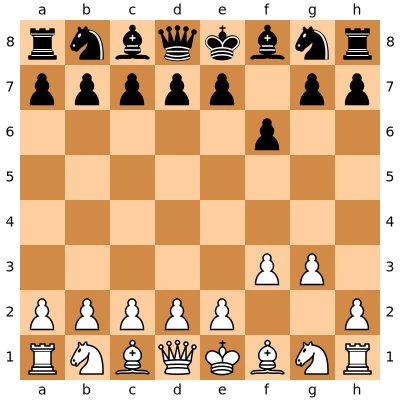



BLACK Turn
Time: 18.838417291641235 s
Move in UCI format: g7g6
Time taken by Move: 18.838638305664062


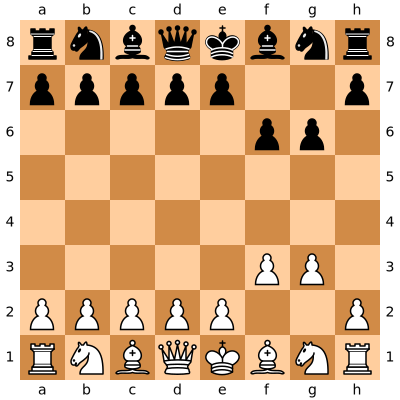



WHITE Turn
Time: 20.823617219924927 s
Move in UCI format: c2c3
Time taken by Move: 20.824347972869873


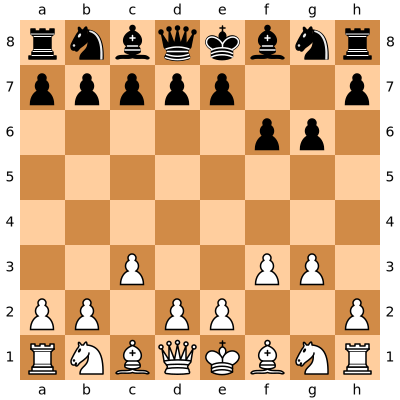



BLACK Turn
Time: 23.267113208770752 s
Move in UCI format: c7c6
Time taken by Move: 23.26814341545105


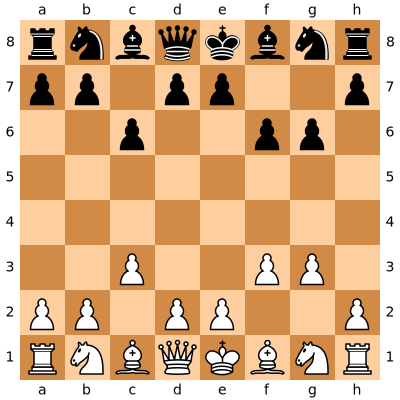



WHITE Turn
Time: 26.354572296142578 s
Move in UCI format: f1h3
Time taken by Move: 26.355309009552002


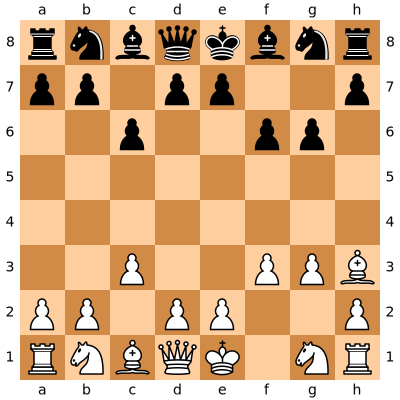



BLACK Turn
Time: 29.218425273895264 s
Move in UCI format: f8h6
Time taken by Move: 29.220099687576294


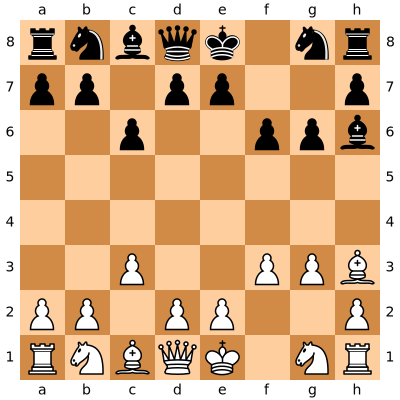



WHITE Turn
Time: 31.91029667854309 s
Move in UCI format: d1b3
Time taken by Move: 31.910529613494873


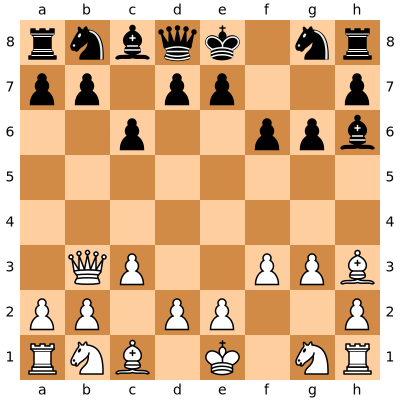



BLACK Turn
Time: 49.907718896865845 s
Move in UCI format: d8c7
Time taken by Move: 49.90794610977173


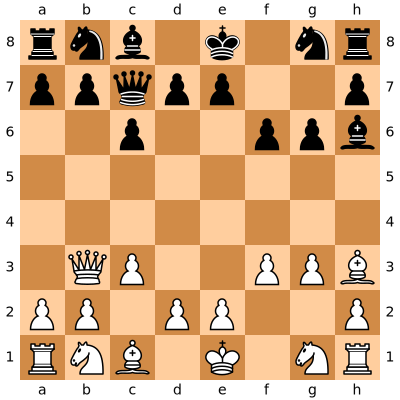

In [142]:
game_between_two_computer(3)